# FTIR Data-Analysis

# Objective2: Create a model to classify the types of coffee and determine the quality features. 

## Importing Frameworks

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

## Importing Data

In [2]:
df = pd.read_csv('./Data/FTIR_Spectra_instant_coffee.csv',skiprows=[2]) 
df = df.transpose()
df.columns=df.iloc[0,:] #Wavelength numbers as Column Names 
df = df.iloc[1:,:] #Removing Wavelengths from the data
df = df.rename(columns={"Group Code:": "label"}) #Labeling -> 1:'Arabica' , 2:'Robusta'
df.columns.name = None
df.index.name = 'Sample Number' 
df['label'].astype('category')
print(df.info())
print(df.head())
#df.to_excel('./Data/coffees.xlsx') ##Exported to_excel to be used by Unscrambler Application for Smoothening

<class 'pandas.core.frame.DataFrame'>
Index: 58 entries, 1 to 58
Columns: 287 entries, label to 1910.644
dtypes: object(287)
memory usage: 130.5+ KB
None
              label  810.548  814.408  818.268  822.128  825.988  829.848  \
Sample Number                                                               
1                 1  21.2276  21.8375    22.73  22.5177  21.0402  19.2563   
2                 1  10.3642  10.5696  10.4489  10.1007  9.62037   8.8825   
3                 1  13.1183  13.5071  13.4735  12.8714  12.1819  11.2395   
4                 1  15.6684  15.8039  15.9776  15.5695  14.9504  14.0296   
5                 1   16.635  17.0553  17.6105  17.2116  16.2179  15.2878   

               833.708  837.568  841.428  ... 1875.904 1879.764 1883.624  \
Sample Number                             ...                              
1               18.518  18.3478   18.044  ...  4.29997  4.27192  4.25118   
2              8.41553  8.21022  7.91643  ...  1.51893  1.50512  1.49313   
3 

## Visualizing the Initial Sample spectroscopies

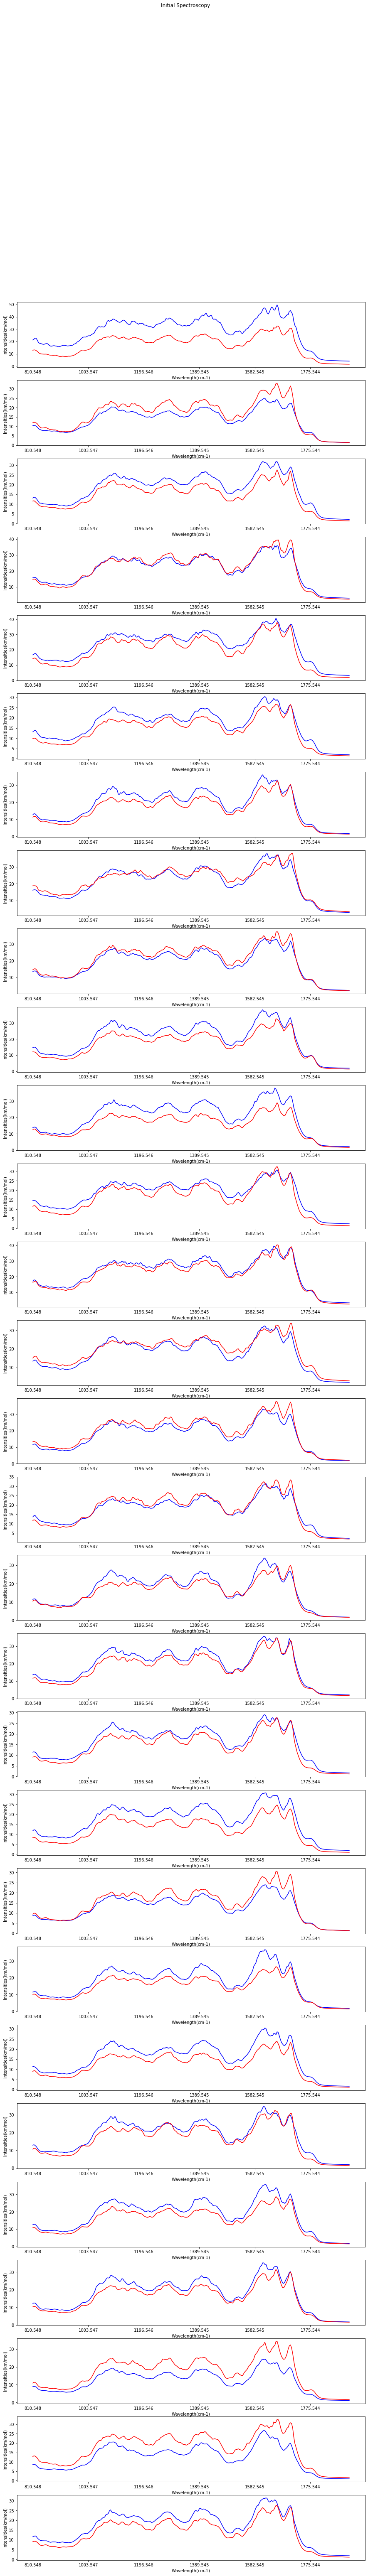

In [3]:
fig1 , ax = plt.subplots(29,1,figsize=(15,100))
count = -1
for i,j in zip(range(0,29),range(29,len(df))):
    count += 1
    df.iloc[i,1:].plot(kind='line',ax=ax[count],color='b') #Blue line graph for label 'Arabica'
    df.iloc[j,1:].plot(kind='line',ax=ax[count],color='r') #Red line graph for label 'Robusta'
    ax[count].set_xlabel('Wavelength(cm-1)')
    ax[count].set_ylabel('Intensities(km/mol)')
plt.suptitle("Initial Spectroscopy")
fig1.savefig('./Visualizations/Graphs/Initial_Spectroscopy.png')
plt.show()

## Pre-processing the Sample Spectroscopies
### Smoothening Data (Using Unscrambler)
For Removal of noise during data acquisition.
Smoothening is performed using 9 nearby points as reference using a Gaussian Filter.

label    810.548    814.408    818.268    822.128    825.988  \
Sample Number                                                                 
1                  1  21.598272  21.747147  21.714247  21.367149  20.708044   
2                  1  10.381591  10.316675  10.151089   9.865037   9.477925   
3                  1  13.200082  13.143690  12.940599  12.561908  12.047924   
4                  1  15.710328  15.666178  15.508862  15.196260  14.738603   
5                  1  16.858377  16.926777  16.856600  16.563139  16.046402   

                 829.848    833.708    837.568    841.428  ...  1875.904  \
Sample Number                                              ...             
1              19.897278  19.137430  18.559246  18.191006  ...  4.313540   
2               9.048888   8.644108   8.312979   8.072685  ...  1.518817   
3              11.496792  11.011354  10.652355  10.413837  ...  2.275815   
4              14.211459  13.712920  13.319352  13.063190  ...  3.070550   
5    

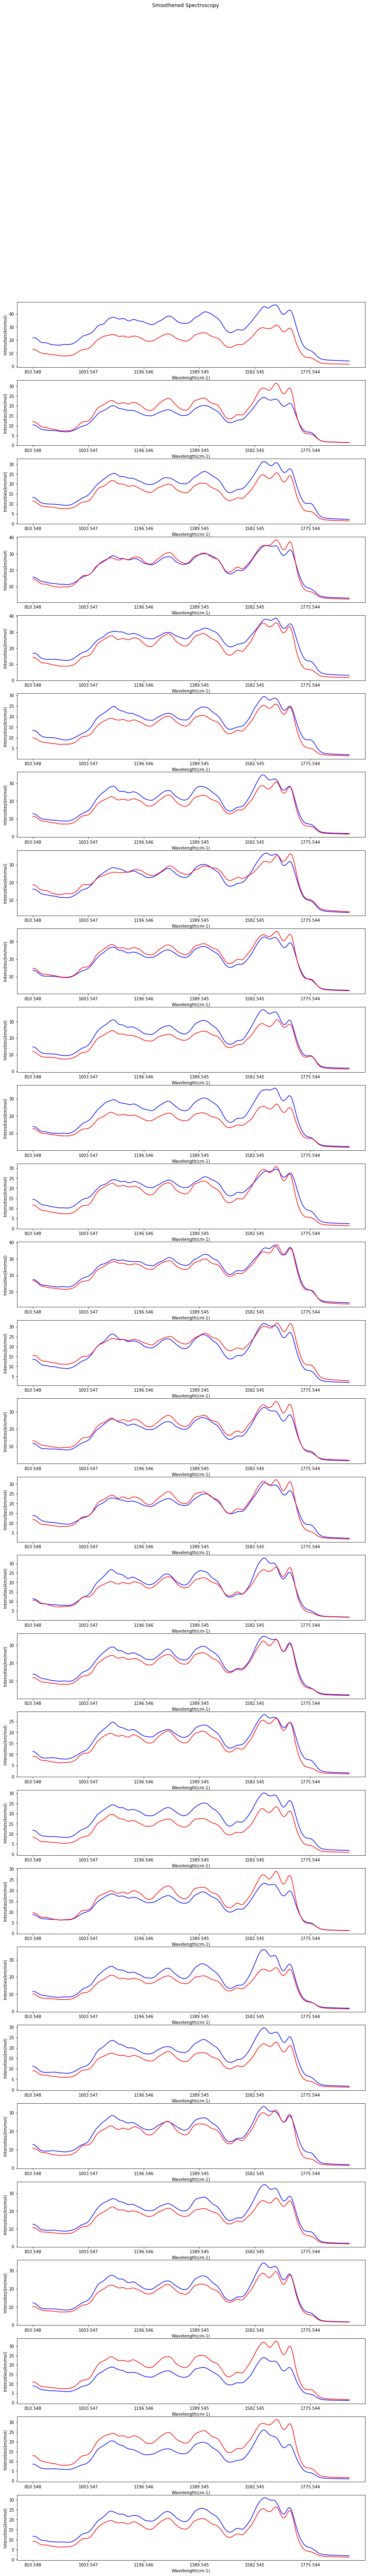

In [4]:
df_smooth = pd.read_excel('./Obj2_data/coffees.xlsx',sheet_name=1,index_col=0,header=0)
print(df_smooth.head())
fig2 , ax = plt.subplots(29,1,figsize=(15,100))
count = -1
for i,j in zip(range(0,29),range(29,len(df))):
    count += 1
    df_smooth.iloc[i,1:].plot(kind='line',ax=ax[count],color='b')
    df_smooth.iloc[j,1:].plot(kind='line',ax=ax[count],color='r')
    ax[count].set_xlabel('Wavelength(cm-1)')
    ax[count].set_ylabel('Intensities(km/mol)')
plt.suptitle("Smoothened Spectroscopy")
fig2.savefig('./Visualizations/Graphs/Smoothened_Spectroscopy.png')
plt.show()

### Normalized using SNV Normalization
SNV Normalization is Mean Normalization followed by Standard Deviation Feature Scalling

label   810.548   814.408   818.268   822.128   825.988  \
Sample Number                                                            
1                  1 -0.547539 -0.534995 -0.537767 -0.567014 -0.622549   
2                  1 -0.519458 -0.529821 -0.556256 -0.601921 -0.663720   
3                  1 -0.588651 -0.595801 -0.621550 -0.669562 -0.734728   
4                  1 -0.548191 -0.553047 -0.570349 -0.604731 -0.655066   
5                  1 -0.611446 -0.604372 -0.611630 -0.641981 -0.695423   

                829.848   833.708   837.568   841.428  ...  1875.904  \
Sample Number                                          ...             
1             -0.690864 -0.754889 -0.803606 -0.834634  ... -2.003943   
2             -0.732212 -0.796831 -0.849693 -0.888054  ... -1.934318   
3             -0.804604 -0.866151 -0.911666 -0.941907  ... -1.973692   
4             -0.713044 -0.767876 -0.811162 -0.839336  ... -1.938373   
5             -0.762378 -0.829702 -0.887596 -0.931314  ... -2.00

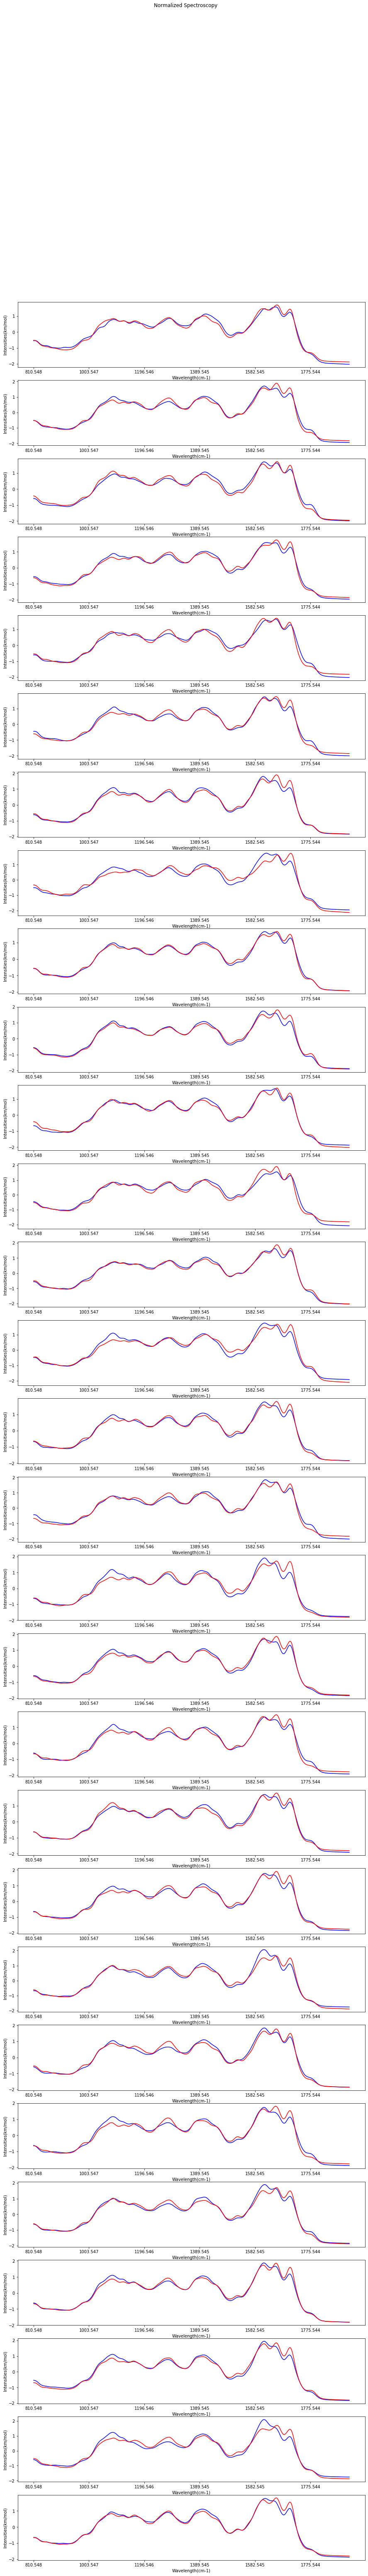

In [5]:
df_snv = df_smooth
for i in range(df_smooth.shape[0]):
    sample = df_smooth.iloc[i,1:]
    mean = sample.mean()
    std = sample.std()
    df_snv.iloc[i,1:] = (df_smooth.iloc[i,1:]-mean)/std
print(df_snv.head())
fig3,ax = plt.subplots(29,1,figsize=(15,100))
count = -1
for i,j in zip(range(0,29),range(29,len(df))):
    count += 1
    df_snv.iloc[i,1:].plot(kind='line',ax=ax[count],color='b')
    df_snv.iloc[j,1:].plot(kind='line',ax=ax[count],color='r')
    ax[count].set_xlabel('Wavelength(cm-1)')
    ax[count].set_ylabel('Intensities(km/mol)')
plt.suptitle("Normalized Spectroscopy")
fig3.savefig('./Visualizations/Graphs/Noramlized_Spectroscopy.png')
plt.show()

## Importing SKLEARN modules

In [6]:
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import export_graphviz

### Validating Principal Component Analysis
Validation for the Number of PCA Components to be used and the kind of SVD to be used 

Variance considered = 99.24936152050888% ; Number of PCA Components = 20 ; svd_solver = 'fill'


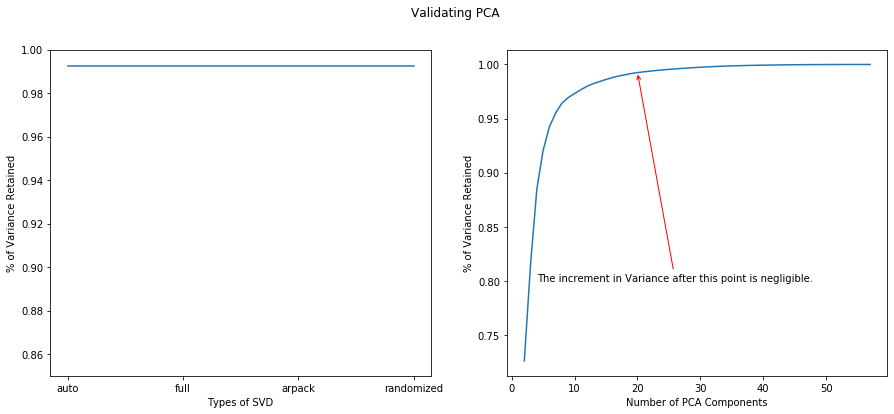

In [7]:
fig4,ax = plt.subplots(1,2,figsize=(15,6))

svd=['auto', 'full', 'arpack', 'randomized']
scores_1 = []
for s in svd:
    pca_1 = PCA(n_components=20,svd_solver=s)
    pca_1.fit(df_snv.iloc[:,1:])
    compressed = pca_1.transform(df_snv.iloc[:,1:])
    scores_1.append(pca_1.explained_variance_ratio_.cumsum()[-1])
ax[0].plot(range(4),scores_1)
ax[0].set_xlabel("Types of SVD")
ax[0].set_ylabel("% of Variance Retained")
ax[0].set_xticks(range(4))
ax[0].set_xticklabels(svd)
ax[0].set_ylim([0.85,1.0])

scores_2 = []
for i in range(2,58):
    pca = PCA(n_components=i,svd_solver='full')
    pca.fit(df_snv.iloc[:,1:])
    compressed = pca.transform(df_snv.iloc[:,1:])
    scores_2.append(pca.explained_variance_ratio_.cumsum()[-1])
ax[1].plot(range(2,58),scores_2)
ax[1].set_xlabel("Number of PCA Components")
ax[1].set_ylabel("% of Variance Retained")
ax[1].annotate("The increment in Variance after this point is negligible.",xy=[20,0.9924936152050888],xytext=[4,0.8],arrowprops={'arrowstyle':'->','color':'r'})
print("Variance considered = 99.24936152050888% ; Number of PCA Components = 20 ; svd_solver = 'fill'")

plt.suptitle("Validating PCA")
fig4.savefig('./Visualizations/Graphs/PCA_Componenets_Validation.png')
plt.show()

### Dimensionality Reduction Using Principal Component Ananlysis

In [8]:
pca = PCA(n_components=20,svd_solver='full')
pca.fit(df_snv.iloc[:,1:])
compressed = pca.transform(df_snv.iloc[:,1:])
col_names = []
for i in range(1,21):
    col_names.append('PCA Component '+str(i))
df_compressed = pd.DataFrame(compressed,columns=col_names)
df_compressed.set_index(df_snv.index,inplace=True)
labels = df_snv['label']
df_compressed['label'] = labels
print(df_compressed.head())

PCA Component 1  PCA Component 2  PCA Component 3  \
Sample Number                                                      
1                     1.118347        -1.047292        -0.964180   
2                    -0.394161        -0.871394         0.445007   
3                     0.045874        -1.150290         0.700776   
4                     0.383090        -0.693605        -0.579283   
5                     0.839105        -1.269617         0.039145   

               PCA Component 4  PCA Component 5  PCA Component 6  \
Sample Number                                                      
1                    -0.178061        -0.002051        -0.387988   
2                    -0.136339         0.034086        -0.177055   
3                    -0.302200        -0.267341        -0.079975   
4                    -0.063656        -0.055334        -0.036252   
5                    -0.223798        -0.412567         0.047162   

               PCA Component 7  PCA Component 8  PCA Componen

## Feature and Target extraction

In [9]:
X = df_compressed.iloc[:,:-1]
y = df_compressed.loc[:,'label'].astype('category')
print("features\n",X.head())
print("Target\n",y.head())

features
                PCA Component 1  PCA Component 2  PCA Component 3  \
Sample Number                                                      
1                     1.118347        -1.047292        -0.964180   
2                    -0.394161        -0.871394         0.445007   
3                     0.045874        -1.150290         0.700776   
4                     0.383090        -0.693605        -0.579283   
5                     0.839105        -1.269617         0.039145   

               PCA Component 4  PCA Component 5  PCA Component 6  \
Sample Number                                                      
1                    -0.178061        -0.002051        -0.387988   
2                    -0.136339         0.034086        -0.177055   
3                    -0.302200        -0.267341        -0.079975   
4                    -0.063656        -0.055334        -0.036252   
5                    -0.223798        -0.412567         0.047162   

               PCA Component 7  PCA 

## Validating Data Split

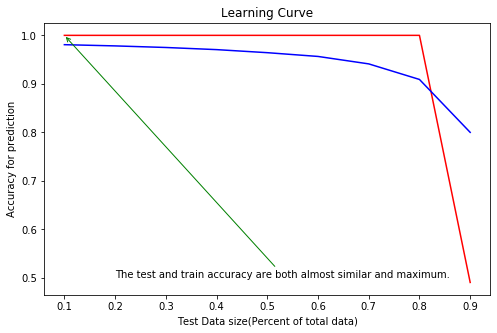

In [10]:
scores_test = []
scores_train = []
for i in np.arange(0.9,0.0,-0.1):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=i, random_state=42)
    clf = SVC(gamma='auto',kernel='linear',C=1)
    clf.fit(X_train,y_train)
    scores_test.append(clf.score(X_test,y_test))
    scores_train.append(clf.score(X_train,y_train))
fig5,ax = plt.subplots(1,1,figsize=(8,5))
ax.plot(np.arange(0.9,0.0,-0.1),scores_test,'r')
ax.plot(np.arange(0.9,0.0,-0.1),scores_train,'b')
ax.set_xlabel("Test Data size(Percent of total data)")
ax.set_ylabel("Accuracy for prediction")
ax.set_title("Learning Curve")
ax.annotate("The test and train accuracy are both almost similar and maximum.",xy=[0.1,1.0],xytext=[0.2,0.5],arrowprops={'arrowstyle':'->','color':'g'})
plt.title('Learning Curve')
fig5.savefig('./Visualizations/Graphs/Learning_Curve.png')
plt.show()

## Data Set Splitting

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

## Model Trainning
3 Classification Models will be tested

### Logestic Regression Classifier

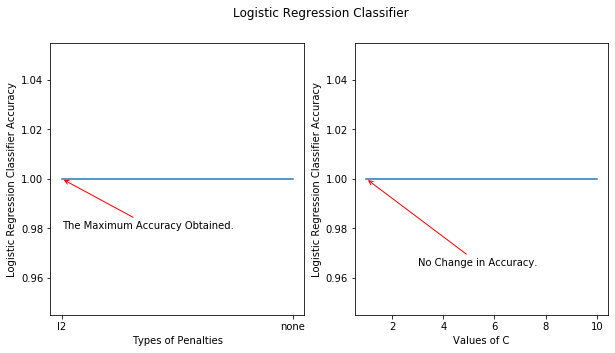

In [12]:
from sklearn.linear_model import LogisticRegression
fig6,ax=plt.subplots(1,2,figsize=(10,5))
plt.suptitle("Logistic Regression Classifier")

#Validating for the appropriate type of Penalty.
scores_1 = []
penalties = ['l2', 'none']
for p in penalties:
    clf = LogisticRegression(penalty=p)
    clf.fit(X_train,y_train)
    scores_1.append(clf.score(X_test,y_test))
ax[0].plot(np.arange(2),scores_1)
ax[0].set_xlabel('Types of Penalties')
ax[0].set_ylabel('Logistic Regression Classifier Accuracy')
ax[0].set_xticks(range(2))
ax[0].set_xticklabels(penalties)
ax[0].annotate("The Maximum Accuracy Obtained.",xy=[0,1],xytext=[0,0.98],arrowprops={'arrowstyle':'->','color':'r'})

#Validating for the most appropriate value of C.
scores_2 = []
for c in range(1,11):
    clf = LogisticRegression(penalty='none',C=c)
    clf.fit(X_train,y_train)
    scores_2.append(clf.score(X_test,y_test))
ax[1].plot(np.arange(1,11),scores_2)
ax[1].set_xlabel('Values of C')
ax[1].set_ylabel('Logistic Regression Classifier Accuracy')
ax[1].annotate("No Change in Accuracy.",xy=[1,1],xytext=[3,0.965],arrowprops={'arrowstyle':'->','color':'r'})
fig6.savefig('./Visualizations/Graphs/Validation_Logistic_Regression.png')
plt.show()

### Support Vector Machine Classifier

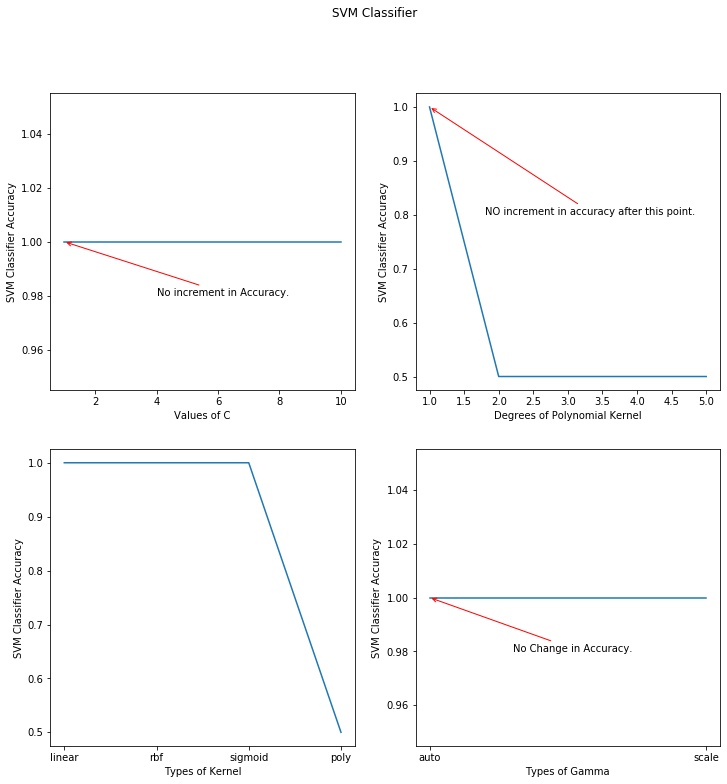

In [13]:
fig7,ax = plt.subplots(2,2,figsize=(12,12))
plt.suptitle("SVM Classifier")

#Validating for the most appropriate value of C.
scores_1 = []
for c in range(1,11):
    clf = SVC(gamma='auto',C=c)
    clf.fit(X_train,y_train)
    scores_1.append(clf.score(X_test,y_test))
ax[0,0].plot(np.arange(1,11),scores_1)
ax[0,0].set_xlabel('Values of C')
ax[0,0].set_ylabel('SVM Classifier Accuracy')
ax[0,0].annotate("No increment in Accuracy.",xy=[1,1],xytext=[4,0.980],arrowprops={'arrowstyle':'->','color':'r'})

#Validating for the appropriate degree of polynomial kernel.
scores_2=[]
for deg in range(1,6):
    clf = SVC(gamma='auto',kernel='poly',C=1,degree=deg)
    clf.fit(X_train,y_train)
    scores_2.append(clf.score(X_test,y_test))
ax[0,1].plot(np.arange(1,6),scores_2)
ax[0,1].set_xlabel('Degrees of Polynomial Kernel')
ax[0,1].set_ylabel('SVM Classifier Accuracy')
ax[0,1].annotate("NO increment in accuracy after this point.",xy=[1,1],xytext=[1.8,0.8],arrowprops={'arrowstyle':'->','color':'r'})

#Validating for the appropriate SVM kernel to be used.
scores_3=[]
kernels = ['linear','rbf','sigmoid','poly']
for k in kernels:
    clf = SVC(gamma='auto',kernel=k,C=1)
    clf.fit(X_train,y_train)
    scores_3.append(clf.score(X_test,y_test))
ax[1,0].plot(np.arange(4),scores_3)
ax[1,0].set_xlabel('Types of Kernel')
ax[1,0].set_ylabel('SVM Classifier Accuracy')
ax[1,0].set_xticks(range(4))
ax[1,0].set_xticklabels(kernels)

#Validating for the appropriate gamma function.
scores_4 = []
gamma = ['auto','scale']
for g in gamma:
    clf = SVC(gamma=g,kernel='rbf',C=1)
    clf.fit(X_train,y_train)
    scores_4.append(clf.score(X_test,y_test))
ax[1,1].plot(np.arange(2),scores_4)
ax[1,1].set_xlabel('Types of Gamma')
ax[1,1].set_ylabel('SVM Classifier Accuracy')
ax[1,1].set_xticks(range(2))
ax[1,1].set_xticklabels(gamma)
ax[1,1].annotate("No Change in Accuracy.",xy=[0,1],xytext=[0.3,0.98],arrowprops={'arrowstyle':'->','color':'r'})
fig7.savefig('./Visualizations/Graphs/Validation_SVM.png')
plt.show()

##### Random Forest Classifier

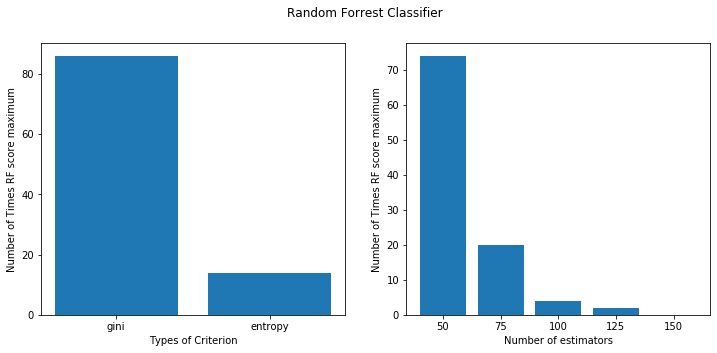

In [14]:
fig8,ax = plt.subplots(1,2,figsize=(12,5))
plt.suptitle("Random Forrest Classifier")

criteria = ['gini','entropy']
scores = np.zeros((2,),dtype=int)
for i in range(100):
    maxm = 0
    count = 0
    for j,c in enumerate(criteria):
        clf = RandomForestClassifier(n_estimators=50,criterion=c)
        clf.fit(X_train,y_train)
        temp = clf.score(X_test,y_test)
        if temp > maxm:
            maxm = temp
            count = j
    scores[count] += 1
ax[0].bar(range(2),scores)
ax[0].set_xlabel("Types of Criterion")
ax[0].set_ylabel("Number of Times RF score maximum")
ax[0].set_xticks(range(2))
ax[0].set_xticklabels(criteria)

estimators = np.arange(50,151,25)
scores = np.zeros((5,),dtype=int)
for i in range(100):
    maxm = 0
    count = 0
    for j,n in enumerate(estimators):
        clf = RandomForestClassifier(n_estimators=n,criterion='gini')
        clf.fit(X_train,y_train)
        temp = clf.score(X_test,y_test)
        if temp > maxm:
            maxm = temp
            count = j
    scores[count] += 1
ax[1].bar(range(5),scores)
ax[1].set_xlabel("Number of estimators")
ax[1].set_ylabel("Number of Times RF score maximum")
ax[1].set_xticks(range(5))
ax[1].set_xticklabels(estimators)

fig8.savefig('./Visualizations/Graphs/Validation_Random_Forest.png')
plt.show()

### Comparing Various Classifier Models
As we have found the most optimal parameters for each classifier, we will now compare the working of the classifiers.

The Maximum Accuracy obtained is:  100.0 %


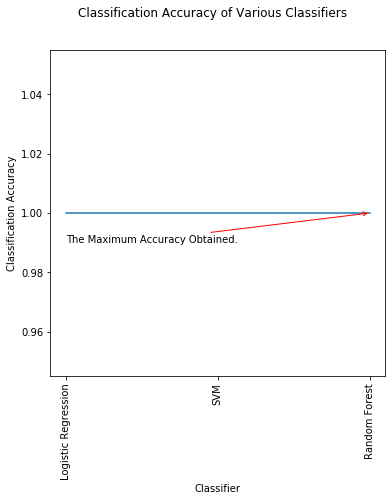

In [15]:
score = []

clf_lr = LogisticRegression
clf_lr = LogisticRegression(penalty='l2',C=1)
clf_lr.fit(X_train,y_train)
score.append(clf_lr.score(X_test,y_test))

clf_svm = SVC(gamma='auto',kernel='linear',C=1)
clf_svm.fit(X_train,y_train)
score.append(clf_svm.score(X_test,y_test))

maxm = accuracy = 0
Decision_Tree = None
for i in range(100):
    clf_rf = RandomForestClassifier(n_estimators=50,criterion='gini')
    clf_rf.fit(X_train,y_train)
    temp = clf_rf.score(X_test,y_test)
    if temp > maxm:
        maxm = temp
        Decision_Tree = clf_rf.estimators_[21]
        accuracy = temp
score.append(maxm)

fig9,ax = plt.subplots(1,1,figsize=(6,6))
ax.plot(range(3),score)
ax.set_xlabel('Classifier')
ax.set_ylabel("Classification Accuracy")
ax.set_xticks(range(3))
ax.set_xticklabels(['Logistic Regression','SVM','Random Forest'],rotation=90)
plt.suptitle("Classification Accuracy of Various Classifiers")
ax.annotate("The Maximum Accuracy Obtained.",xy=[2,accuracy],xytext=[0,0.99],arrowprops={'arrowstyle':'->','color':'r'})
print("The Maximum Accuracy obtained is: ",accuracy*100,"%")

fig9.savefig('./Visualizations/Graphs/Comparing_Various_Classifiers.png')
plt.show()

## Visualize Trained Model
The Best Classifier Model thus is a Random Forest Classifier, we will now visualize the optimal Decision Tree which attains the maximum accuracy. 

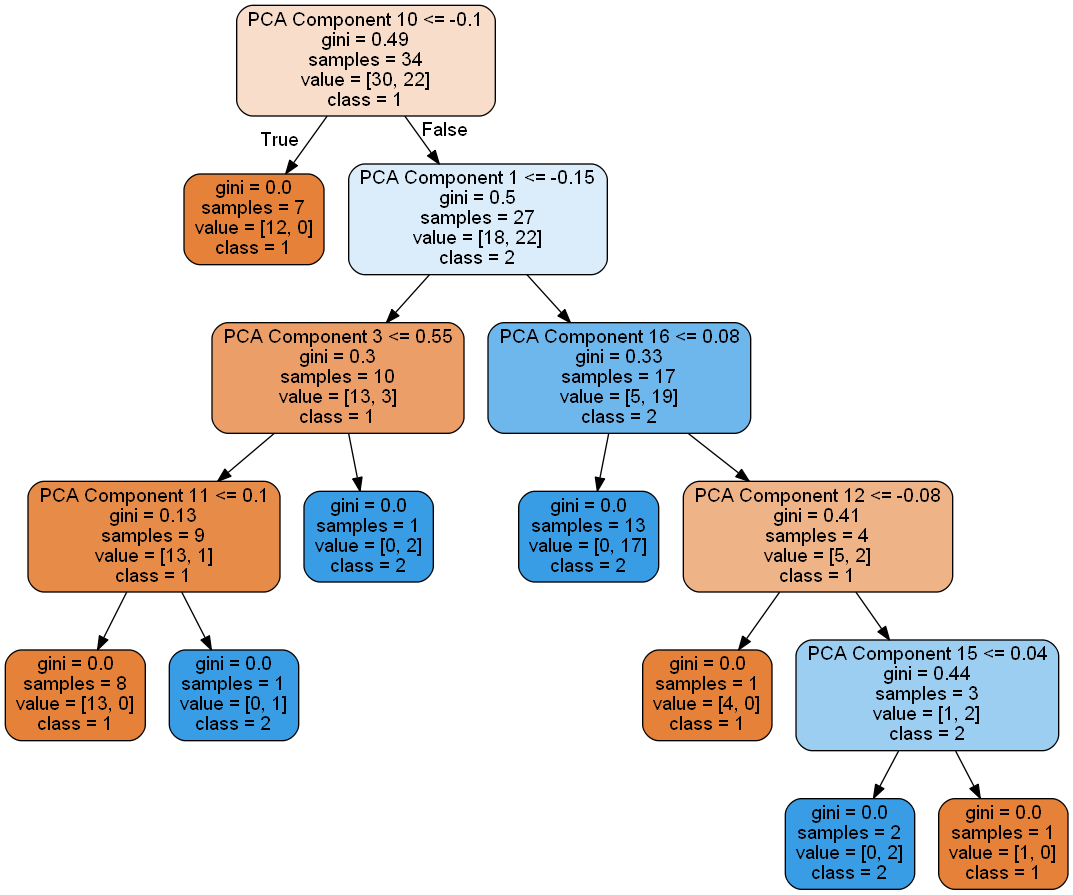

In [16]:
export_graphviz(Decision_Tree, out_file='./Visualizations/Model/Model.dot', feature_names = col_names, class_names = ['1','2'], rounded = True, proportion = False, precision = 2, filled = True)

import pydot
(graph,) = pydot.graph_from_dot_file('./Visualizations/Model/Model.dot')
graph.write_png('./Visualizations/Model/Model.png')

from IPython.display import Image
Image(filename = './Visualizations/Model/Model.png')